In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
from pandas_profiling import ProfileReport

In [2]:
train, test, validate = prepare.prep_titanic()

train, test, validate = prepare.impute(train, test, validate, my_strategy = 'mean', column_list = 'age')
train

,survived,age,sibsp,parch,fare,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
769,0,32.000000,0,0,8.3625,Third,Southampton,1,0,1,1
607,1,27.000000,0,0,30.5000,First,Southampton,1,0,1,1
661,0,40.000000,0,0,7.2250,Third,Cherbourg,1,0,0,1
204,1,18.000000,0,0,8.0500,Third,Southampton,1,0,1,1
205,0,2.000000,0,1,10.4625,Third,Southampton,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
773,0,29.794372,0,0,7.2250,Third,Cherbourg,1,0,0,1
118,0,24.000000,0,1,247.5208,First,Cherbourg,0,0,0,1
550,1,17.000000,0,2,110.8833,First,Cherbourg,0,0,0,1
323,1,22.000000,1,1,29.0000,Second,Southampton,0,0,1,0


In [3]:
validate

,survived,age,sibsp,parch,fare,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
696,0,44.000000,0,0,8.0500,Third,Southampton,1,0,1,1
873,0,47.000000,0,0,9.0000,Third,Southampton,1,0,1,1
694,0,60.000000,0,0,26.5500,First,Southampton,1,0,1,1
705,0,39.000000,0,0,26.0000,Second,Southampton,1,0,1,1
184,1,4.000000,0,2,22.0250,Third,Southampton,0,0,1,0
402,0,21.000000,1,0,9.8250,Third,Southampton,0,0,1,0
28,1,29.794372,0,0,7.8792,Third,Queenstown,1,1,0,0
159,0,29.794372,8,2,69.5500,Third,Southampton,0,0,1,1
648,0,29.794372,0,0,7.5500,Third,Southampton,1,0,1,1
232,0,59.000000,0,0,13.5000,Second,Southampton,1,0,1,1


In [4]:
pd.crosstab(train.survived, train.sex_male, margins = True, normalize = True)

sex_male,0,1,All
survived,,,
0,0.088028,0.52993,0.617958
1,0.257042,0.12500,0.382042
All,0.345070,0.65493,1.000000


In [5]:
pd.crosstab(train.survived, train['class'], normalize = True)

class,First,Second,Third
survived,,,
0,0.095070,0.107394,0.415493
1,0.147887,0.091549,0.142606


In [6]:
pd.crosstab(train.survived, train.embark_town, normalize = True)

embark_town,Cherbourg,Queenstown,Southampton
survived,,,
0,0.096831,0.045775,0.475352
1,0.103873,0.038732,0.239437


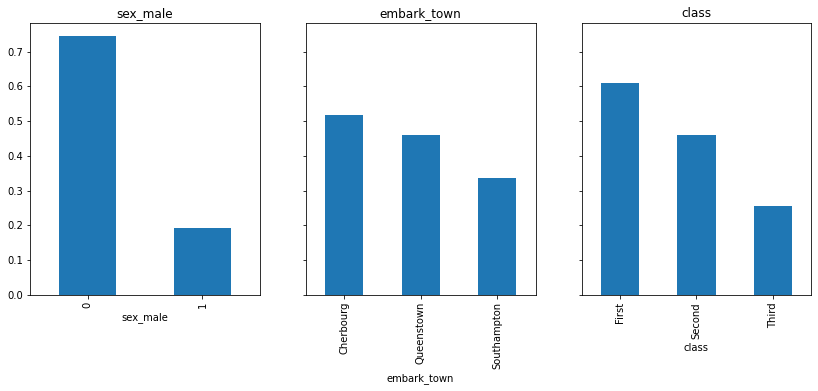

In [7]:
survival_rate = train.survived.mean()
features = ['sex_male', 'embark_town', 'class']
fig, axs = plt.subplots(1,3, figsize = (14,5), sharey = True)
for i, feature in enumerate(features):
    #print(i, feature)
    train.groupby(feature).survived.mean().plot.bar(ax= axs[i])
    axs[i].set(title = feature)
    

In [8]:
survival_rate

0.38204225352112675

In [9]:
pd.crosstab(train.survived, train.sex_male, margins = True, normalize = True)

sex_male,0,1,All
survived,,,
0,0.088028,0.52993,0.617958
1,0.257042,0.12500,0.382042
All,0.345070,0.65493,1.000000


In [10]:
pd.crosstab(train.embark_town, train.survived, margins = True, normalize = True)

survived,0,1,All
embark_town,,,
Cherbourg,0.096831,0.103873,0.200704
Queenstown,0.045775,0.038732,0.084507
Southampton,0.475352,0.239437,0.714789
All,0.617958,0.382042,1.000000


<AxesSubplot:xlabel='survived', ylabel='class'>

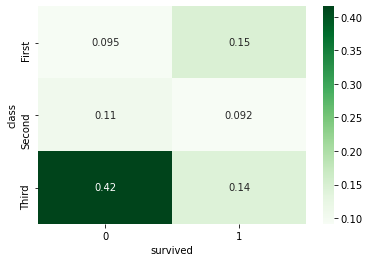

In [11]:
ctab = pd.crosstab(train['class'], train.survived, normalize = True)
sns.heatmap(ctab, cmap = 'Greens', annot = True)

#### in above heat map, the percentage are of the overall people that represent each class and if they survived or not
 - so, 0.42 from third class at 0 : 42% of the people who did not survive were in the third class

#### Comparing three categorical variable

In [12]:
train.pivot_table('survived', 'sex_male', 'class')

class,First,Second,Third
sex_male,,,
0,0.982456,0.911111,0.521277
1,0.345679,0.161765,0.143498


#### df.pivot_table aggregates whereas df.pivot does not aggregate

In [13]:
train.pivot_table('survived', 'sex_male', 'class')

class,First,Second,Third
sex_male,,,
0,0.982456,0.911111,0.521277
1,0.345679,0.161765,0.143498


In [14]:
train.pivot_table('survived', 'sex_male', 'class')

class,First,Second,Third
sex_male,,,
0,0.982456,0.911111,0.521277
1,0.345679,0.161765,0.143498


<AxesSubplot:xlabel='class', ylabel='sex_male'>

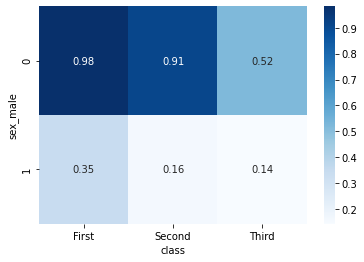

In [15]:
sns.heatmap(train.pivot_table('survived', 'sex_male', 'class'), cmap = "Blues", annot = True)

 - 98 % of the female passengers in first class survived
 - 91% of the female in second class survived
 - 52% of the female in thrid class survived


#### Exploring the target variables against continuous variable

In [16]:
train.groupby('survived').age.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,351.0,30.320229,12.583721,1.00,23.0,29.794372,35.0,71.0
1,217.0,28.943793,13.829790,0.42,22.0,29.794372,35.0,80.0


<AxesSubplot:ylabel='Frequency'>

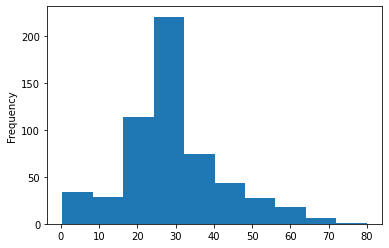

In [17]:
train.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

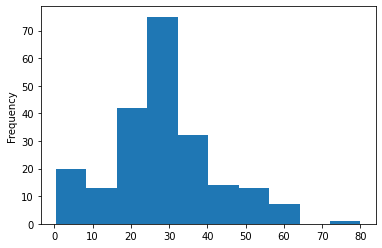

In [18]:
train[train.survived == 1].age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

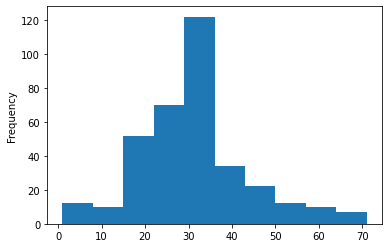

In [19]:
train[train.survived == 0].age.plot.hist()

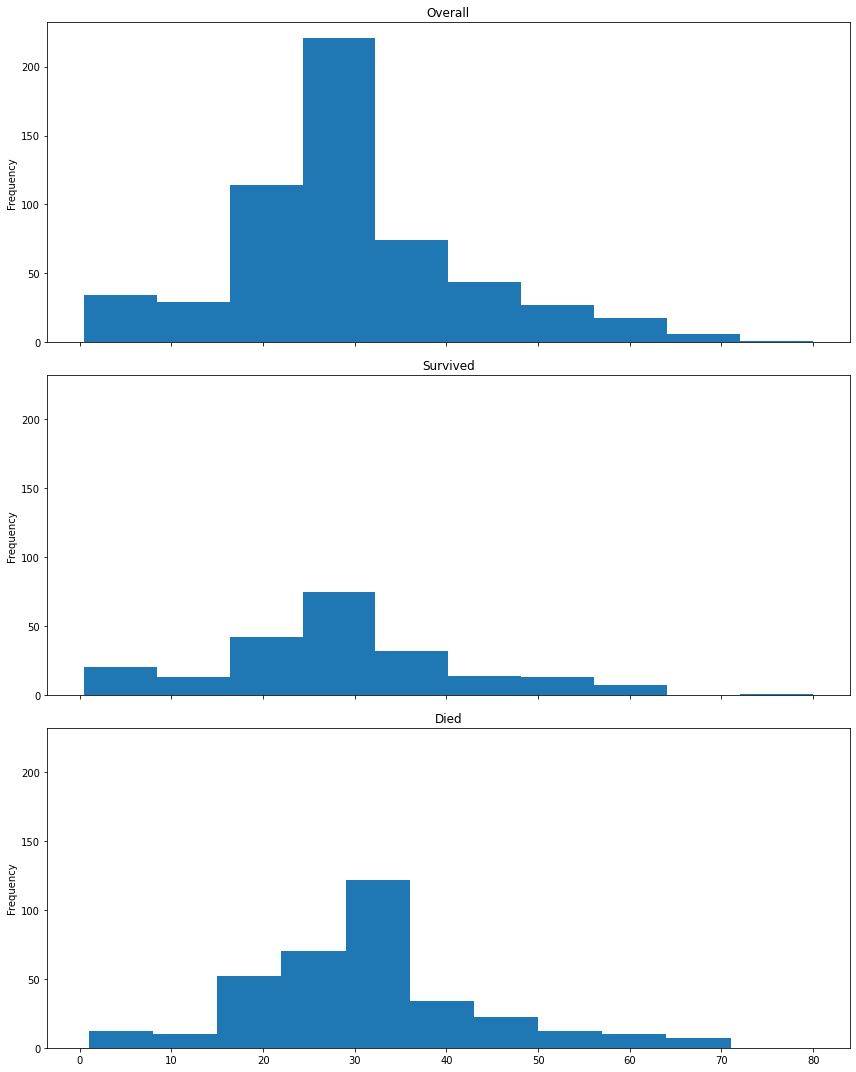

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, sharey=True)

train.age.plot.hist(ax=axs[0], title='Overall')
train[train.survived == 1].age.plot.hist(ax=axs[1], title='Survived')
train[train.survived == 0].age.plot.hist(ax=axs[2], title='Died')
fig.tight_layout()

<AxesSubplot:xlabel='survived', ylabel='fare'>

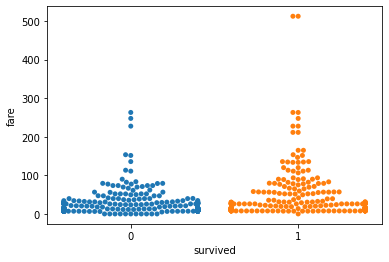

In [21]:
sns.swarmplot(data = train, y = 'fare', x = 'survived')

we can compare 1 cont and 2 categorical variables with swarmplot
 - class
 - survived
 - fare

<AxesSubplot:xlabel='class', ylabel='fare'>

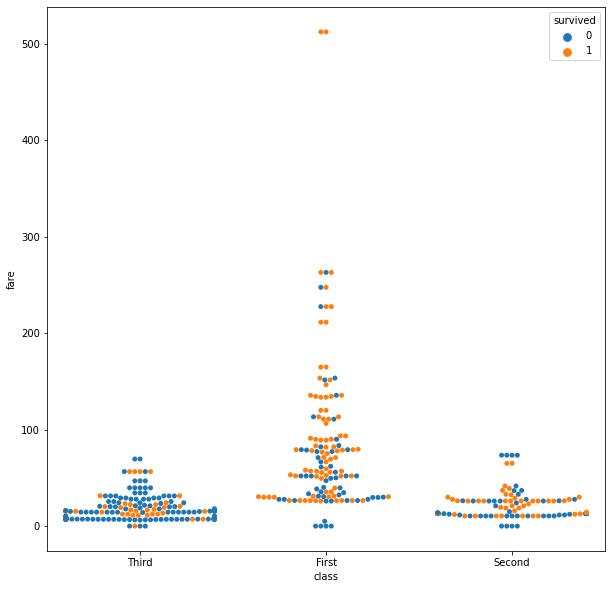

In [22]:
plt.figure(figsize= (10,10))

sns.swarmplot(data = train, x = 'class', y = 'fare', hue = 'survived')

<AxesSubplot:xlabel='class', ylabel='fare'>

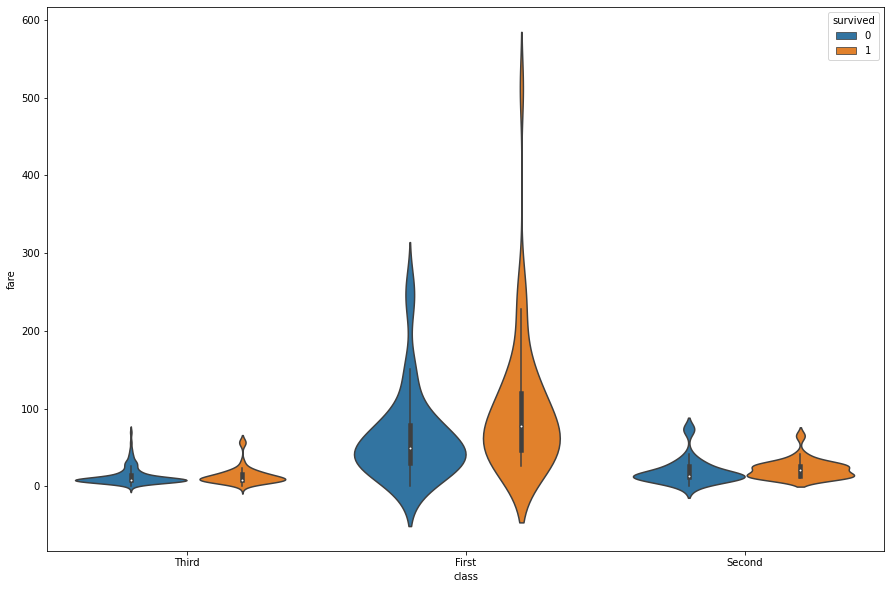

In [23]:
plt.figure(figsize= (15,10))
sns.violinplot(data = train, x = 'class', y = 'fare', hue = 'survived')

In [24]:
train.groupby('embark_town').fare.var()

embark_town
Cherbourg      6747.146226
Queenstown      296.597448
Southampton    1341.282075
Name: fare, dtype: float64

<AxesSubplot:xlabel='embark_town', ylabel='fare'>

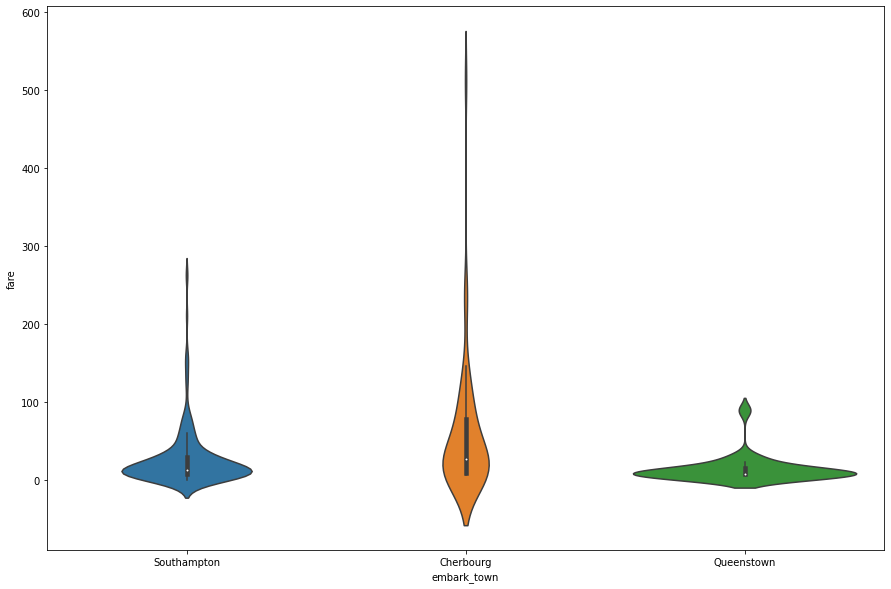

In [25]:
plt.figure(figsize= (15,10))
sns.violinplot(data = train, x = 'embark_town', y = 'fare')

<AxesSubplot:xlabel='embark_town', ylabel='fare'>

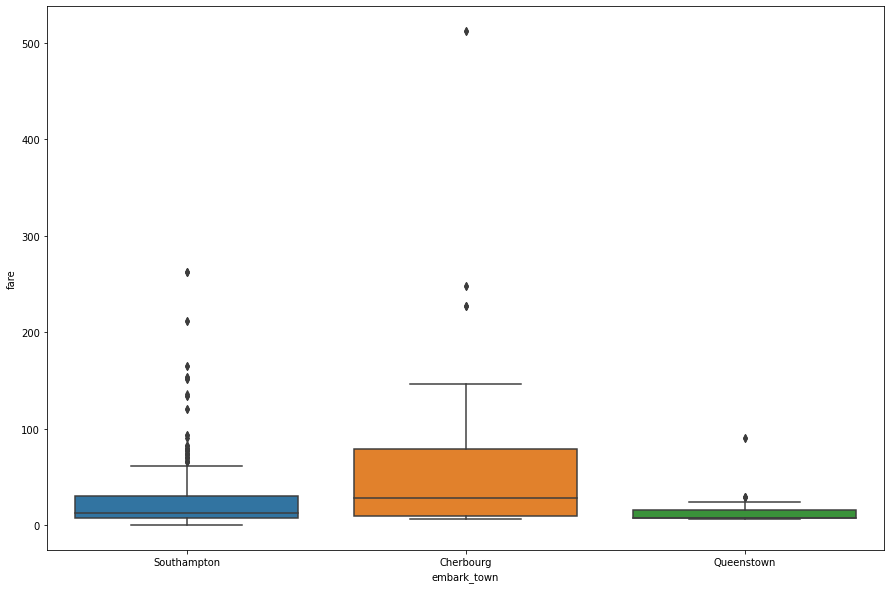

In [26]:
plt.figure(figsize= (15,10))
sns.boxplot(data = train, x = 'embark_town', y = 'fare')

In [27]:
pd.crosstab(train['class'], train.embark_town, margins = True)
# checking if the embark town influences the class of tickets bought
# whihc eventually influenced the survival rate

embark_town,Cherbourg,Queenstown,Southampton,All
class,,,,
First,53,2,83,138
Second,11,2,100,113
Third,50,44,223,317
All,114,48,406,568


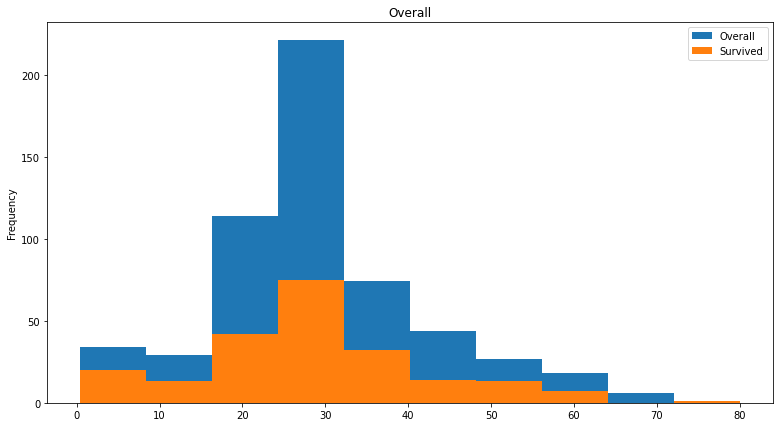

In [28]:
ax = train.age.plot.hist(title='Overall', figsize=(13, 7), label='Overall')
train[train.survived == 1].age.plot.hist(ax=ax, label='Survived')
plt.legend()

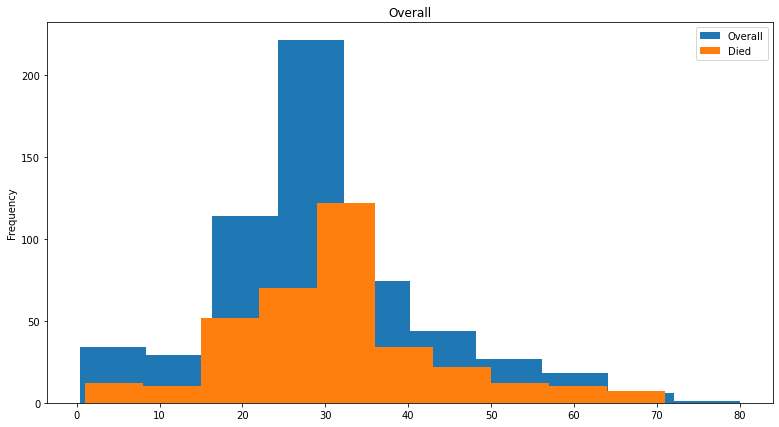

In [29]:
ax = train.age.plot.hist(title='Overall', figsize=(13, 7), label='Overall')
train[train.survived == 0].age.plot.hist(ax=ax, label='Died')
plt.legend()

In [30]:
train

,survived,age,sibsp,parch,fare,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
769,0,32.000000,0,0,8.3625,Third,Southampton,1,0,1,1
607,1,27.000000,0,0,30.5000,First,Southampton,1,0,1,1
661,0,40.000000,0,0,7.2250,Third,Cherbourg,1,0,0,1
204,1,18.000000,0,0,8.0500,Third,Southampton,1,0,1,1
205,0,2.000000,0,1,10.4625,Third,Southampton,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
773,0,29.794372,0,0,7.2250,Third,Cherbourg,1,0,0,1
118,0,24.000000,0,1,247.5208,First,Cherbourg,0,0,0,1
550,1,17.000000,0,2,110.8833,First,Cherbourg,0,0,0,1
323,1,22.000000,1,1,29.0000,Second,Southampton,0,0,1,0


In [31]:
train = train.replace({'class':{'First':'1', 'Second': '2', 'Third': '3'}})
validate = validate.replace({'class':{'First':'1', 'Second': '2', 'Third': '3'}})
test = test.replace({'class':{'First':'1', 'Second': '2', 'Third': '3'}})

In [32]:
train['not_survived'] = (train.survived == 0)
test['not_survived'] = (test.survived == 0)
validate['not_survived'] = (validate.survived == 0)

In [33]:
train

,survived,age,sibsp,parch,fare,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,not_survived
769,0,32.000000,0,0,8.3625,3,Southampton,1,0,1,1,True
607,1,27.000000,0,0,30.5000,1,Southampton,1,0,1,1,False
661,0,40.000000,0,0,7.2250,3,Cherbourg,1,0,0,1,True
204,1,18.000000,0,0,8.0500,3,Southampton,1,0,1,1,False
205,0,2.000000,0,1,10.4625,3,Southampton,0,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
773,0,29.794372,0,0,7.2250,3,Cherbourg,1,0,0,1,True
118,0,24.000000,0,1,247.5208,1,Cherbourg,0,0,0,1,True
550,1,17.000000,0,2,110.8833,1,Cherbourg,0,0,0,1,False
323,1,22.000000,1,1,29.0000,2,Southampton,0,0,1,0,False


In [34]:
train.not_survived.sum()/len(train)

0.6179577464788732

In [35]:
y_train = train.not_survived
y_validate = validate.not_survived
y_test = test.not_survived


x_train = train[['sex_male', 'class', 'fare', 'age']]
x_validate = validate[['sex_male', 'class', 'fare', 'age']]
x_test = test[['sex_male', 'class', 'fare', 'age']]

In [36]:
x_train

,sex_male,class,fare,age
769,1,3,8.3625,32.000000
607,1,1,30.5000,27.000000
661,1,3,7.2250,40.000000
204,1,3,8.0500,18.000000
205,0,3,10.4625,2.000000
...,...,...,...,...
773,1,3,7.2250,29.794372
118,1,1,247.5208,24.000000
550,1,1,110.8833,17.000000
323,0,2,29.0000,22.000000


In [37]:
train.survived.value_counts(normalize = True)

0    0.617958
1    0.382042
Name: survived, dtype: float64

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

## Model 1

In [39]:
logit1 = LogisticRegression(random_state = 123)

In [40]:
logit1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
logit1.coef_

array([[ 2.45135180e+00,  9.18327523e-01, -2.24414493e-03,
         2.20673150e-02]])

In [42]:
logit1.intercept_

array([-3.6933244])

In [43]:
y_pred = logit1.predict(x_train)
len(y_pred)

568

In [44]:
print(confusion_matrix(y_train, y_pred))

[[149  68]
 [ 53 298]]


In [45]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.69      0.71       217
        True       0.81      0.85      0.83       351

    accuracy                           0.79       568
   macro avg       0.78      0.77      0.77       568
weighted avg       0.78      0.79      0.79       568



### The accuracy of model 1 is  79%

In [46]:
y_pred_proba = logit1.predict_proba(x_train)
y_pred_proba[:,1]

array([0.90028519, 0.55075607, 0.91524978, 0.86900119, 0.28542951,
       0.28459491, 0.08745479, 0.46937677, 0.86064327, 0.52588149,
       0.70880929, 0.8611416 , 0.84730116, 0.77338563, 0.23517532,
       0.61927842, 0.89631775, 0.08205849, 0.10527807, 0.07393427,
       0.27707525, 0.2027602 , 0.09096422, 0.7205683 , 0.76656284,
       0.07864547, 0.8958953 , 0.42173764, 0.25974674, 0.13943202,
       0.88578815, 0.88986742, 0.20485409, 0.89595807, 0.10944634,
       0.42627062, 0.78198522, 0.5165644 , 0.89648968, 0.87841528,
       0.8958953 , 0.34194752, 0.87892267, 0.86630946, 0.4214093 ,
       0.36895819, 0.39247027, 0.56858967, 0.77338563, 0.91696296,
       0.91576188, 0.72916651, 0.14205542, 0.90916233, 0.62567698,
       0.09933692, 0.84236536, 0.08925179, 0.18306203, 0.89595284,
       0.4170109 , 0.75346739, 0.78848163, 0.88499301, 0.87876339,
       0.74800823, 0.89595807, 0.44733859, 0.4214093 , 0.88768607,
       0.87643216, 0.88566891, 0.70954009, 0.5619261 , 0.78547

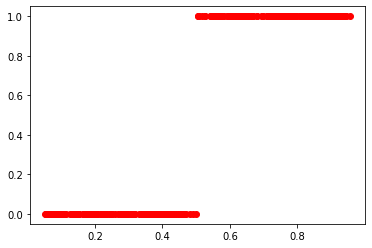

In [47]:
plt.scatter(y_pred_proba[:,1], y_pred,color = 'r')

## Model 2
  #### This will only use sex, class, and fare as predictors, keeping everything else the same

In [48]:
logit2 = LogisticRegression(random_state = 124)

In [49]:
x_train2 = train[['sex_male', 'class', 'fare']]
y_train2 = train.not_survived

In [50]:
logit2.fit(x_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=124, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred2 = logit2.predict(x_train2)

In [52]:
print(classification_report(y_train2, y_pred2))

              precision    recall  f1-score   support

       False       0.74      0.68      0.71       217
        True       0.81      0.85      0.83       351

    accuracy                           0.79       568
   macro avg       0.77      0.77      0.77       568
weighted avg       0.78      0.79      0.78       568



In [53]:
y_pred2_proba = logit2.predict_proba(x_train2)
y_pred2_proba

array([[0.11203808, 0.88796192],
       [0.38530889, 0.61469111],
       [0.11172496, 0.88827504],
       ...,
       [0.43920491, 0.56079509],
       [0.77726724, 0.22273276],
       [0.10975397, 0.89024603]])

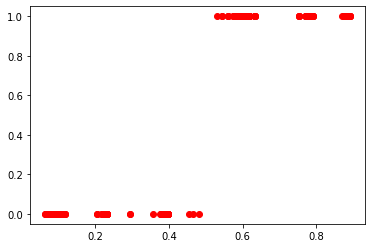

In [54]:
plt.scatter(y_pred2_proba[:, 1], y_pred2,color = 'r')

## Model 3
We will create a model that will take only 2 predictors

In [55]:
x_train3 = train[['sex_male', 'class']]
y_train3 = train.not_survived

In [56]:
logit3 = LogisticRegression(random_state = 125)

In [57]:
logit3.fit(x_train3, y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logit3.coef_

array([[2.51348443, 0.85369496]])

In [59]:
y_pred3 = logit3.predict(x_train3)
y_pred3

array([ True,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
        True,  True,

In [60]:
y_pred3_proba = logit3.predict_proba(x_train3)
y_pred3_proba

array([[0.11157836, 0.88842164],
       [0.40918648, 0.59081352],
       [0.11157836, 0.88842164],
       ...,
       [0.40918648, 0.59081352],
       [0.78456329, 0.21543671],
       [0.11157836, 0.88842164]])

In [61]:
print(classification_report(y_train3, y_pred3))

              precision    recall  f1-score   support

       False       0.74      0.67      0.71       217
        True       0.81      0.86      0.83       351

    accuracy                           0.79       568
   macro avg       0.78      0.77      0.77       568
weighted avg       0.78      0.79      0.78       568



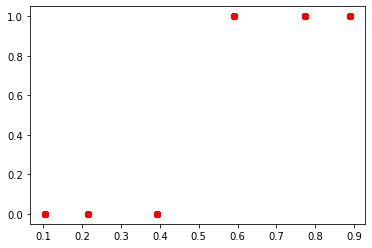

In [62]:
plt.scatter(y_pred3_proba[:, 1], y_pred3,color = 'r')

## Model 4
#### Creating a model with 2 predictors and with a C value of 0.01

In [63]:
x_train4 = train[['sex_male', 'class']]
y_train4 = train.not_survived
logit4 = LogisticRegression(C = 0.01, random_state = 126)

In [64]:
logit4.fit(x_train4, y_train4)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=126, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred4 = logit4.predict(x_train4)
y_pred4_proba = logit4.predict_proba(x_train4)
y_pred4_proba[:, 1]


array([0.71561507, 0.55411312, 0.71561507, 0.71561507, 0.5967242 ,
       0.5967242 , 0.42221778, 0.5967242 , 0.71561507, 0.55411312,
       0.55411312, 0.63877671, 0.71561507, 0.63877671, 0.50976858,
       0.55411312, 0.71561507, 0.42221778, 0.42221778, 0.42221778,
       0.50976858, 0.50976858, 0.42221778, 0.55411312, 0.63877671,
       0.42221778, 0.71561507, 0.5967242 , 0.50976858, 0.50976858,
       0.71561507, 0.71561507, 0.50976858, 0.71561507, 0.42221778,
       0.5967242 , 0.63877671, 0.5967242 , 0.71561507, 0.71561507,
       0.71561507, 0.5967242 , 0.71561507, 0.71561507, 0.5967242 ,
       0.5967242 , 0.5967242 , 0.55411312, 0.63877671, 0.71561507,
       0.71561507, 0.63877671, 0.50976858, 0.71561507, 0.55411312,
       0.42221778, 0.71561507, 0.42221778, 0.50976858, 0.71561507,
       0.5967242 , 0.63877671, 0.63877671, 0.71561507, 0.71561507,
       0.63877671, 0.71561507, 0.5967242 , 0.5967242 , 0.71561507,
       0.71561507, 0.71561507, 0.63877671, 0.55411312, 0.63877

In [66]:
print(classification_report(y_train4, y_pred4))

              precision    recall  f1-score   support

       False       0.98      0.26      0.41       217
        True       0.68      1.00      0.81       351

    accuracy                           0.71       568
   macro avg       0.83      0.63      0.61       568
weighted avg       0.80      0.71      0.66       568



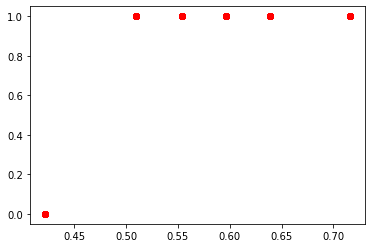

In [67]:
plt.scatter(y_pred4_proba[:, 1], y_pred4,color = 'r')

## Model 5
#### We will try to create some models by changing the predictors and other hyperparameters

In [68]:
x_train5 = train[['sex_male', 'class', 'fare']]
y_train5 = train.not_survived
logit5 = LogisticRegression(C = 0.0001, random_state = 127, class_weight = { True: 1, False: 1.5})

In [69]:
logit5.fit(x_train5, y_train5)

LogisticRegression(C=0.0001, class_weight={False: 1.5, True: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=127, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
logit5.coef_

array([[ 0.00792433,  0.00391004, -0.01473492]])

In [71]:
y_pred5 = logit5.predict(x_train5)

In [72]:
print(classification_report(y_train5, y_pred5))

              precision    recall  f1-score   support

       False       0.59      0.34      0.43       217
        True       0.68      0.85      0.75       351

    accuracy                           0.66       568
   macro avg       0.63      0.60      0.59       568
weighted avg       0.64      0.66      0.63       568



In [73]:
y_pred5_proba = logit5.predict_proba(x_train5)
y_pred5_proba

array([[0.39752042, 0.60247958],
       [0.47956314, 0.52043686],
       [0.39351318, 0.60648682],
       ...,
       [0.75075609, 0.24924391],
       [0.47505046, 0.52494954],
       [0.36841366, 0.63158634]])

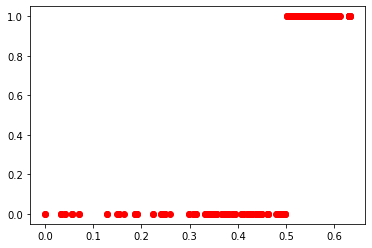

In [74]:
plt.scatter(y_pred5_proba[:,1], y_pred5,color ='r')

### Out of all the models, 
model 1, 2, and 3 have the highest accuracy

we will use these models in validation phase


In [75]:
# lets try model 1, meaning logit1, but we have to make sure the predictors we use to train logit one are the same
# ones as the x_validate
 # Both of them have same features
    
y_val_pred1 = logit1.predict(x_validate)
print(classification_report(y_validate, y_val_pred1))

              precision    recall  f1-score   support

       False       0.73      0.75      0.74        55
        True       0.84      0.83      0.83        88

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



#### Model 1 accuracy got better with the validate data set

In [76]:
# lets try model 2. But lets check the features
print(x_train2.columns)
print(x_validate.columns)

## we must drop a column from validate

Index(['sex_male', 'class', 'fare'], dtype='object')
Index(['sex_male', 'class', 'fare', 'age'], dtype='object')


In [77]:
x_validate2 = validate[['sex_male', 'class', 'fare']]
x_validate2.shape

(143, 3)

In [78]:
y_val_pred2 = logit2.predict(x_validate2)

In [79]:
print(classification_report(y_validate, y_val_pred2))

              precision    recall  f1-score   support

       False       0.70      0.73      0.71        55
        True       0.83      0.81      0.82        88

    accuracy                           0.78       143
   macro avg       0.76      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



#### Model 2's accuracy decreased by 1%

In [80]:
# lets try model 3
print(x_train3.columns)

x_validate3 = validate[['sex_male', 'class']]

Index(['sex_male', 'class'], dtype='object')


In [81]:
y_val_pred3 = logit3.predict(x_validate3)

In [82]:
print(classification_report(y_validate, y_val_pred3))

              precision    recall  f1-score   support

       False       0.74      0.73      0.73        55
        True       0.83      0.84      0.84        88

    accuracy                           0.80       143
   macro avg       0.79      0.78      0.79       143
weighted avg       0.80      0.80      0.80       143



#### Model 3's accuracy increased but is as same as model 1. 




## We can move on to test using either model 1 or model 3